In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics 
import math

# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
import shap

In [2]:
#Importing Data

data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)

In [3]:
#Looking to see which coolumn has most NaNs
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [4]:
# deleting colums with most NaNs. All these colums have more than 10K NaNs. Some have more than 20K.
NaNs = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
X = X.drop(NaNs, axis = 1)
  
Y = df['TARGET']

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                           
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])



#Any NaNs that are left, are less than 1K per feature. Therefore, replacing these NaNs with means of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())

X.shape

(307511, 64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

rf = RandomForestRegressor(n_estimators=65)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=65, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
rf.feature_importances_

array([2.06713295e-03, 4.99971956e-03, 3.94691582e-03, 6.85505937e-03,
       8.37322060e-03, 5.06244010e-02, 4.99400918e-02, 6.68854618e-02,
       3.64844781e-02, 1.15008606e-02, 8.83507481e-03, 1.04360929e-02,
       1.68940375e-02, 1.06907227e-02, 4.98888520e-02, 8.12753347e-02,
       6.96464117e-02, 8.07977992e-02, 7.79251594e-02, 2.63577877e-02,
       0.00000000e+00, 7.28076755e-04, 6.70578967e-03, 6.09149666e-04,
       6.57650726e-03, 4.42261326e-03, 2.55450203e-02, 1.28769082e-02,
       5.23678614e-03, 5.72478111e-03, 2.59539755e-02, 4.24239403e-02,
       1.84956875e-03, 2.06137785e-03, 2.51755153e-03, 5.41287370e-03,
       5.03446019e-03, 5.33894711e-03, 3.52774680e-02, 1.55921840e-02,
       7.75958188e-03, 1.60453089e-02, 7.10024322e-03, 6.80483172e-02,
       8.34562502e-05, 4.26117944e-03, 0.00000000e+00, 2.45920899e-03,
       2.40024789e-03, 9.52334572e-05, 2.39095657e-03, 8.63155043e-04,
       0.00000000e+00, 4.54144223e-04, 0.00000000e+00, 2.56644315e-04,
      

Text(0.5, 0, 'Random Forest Feature Importance')

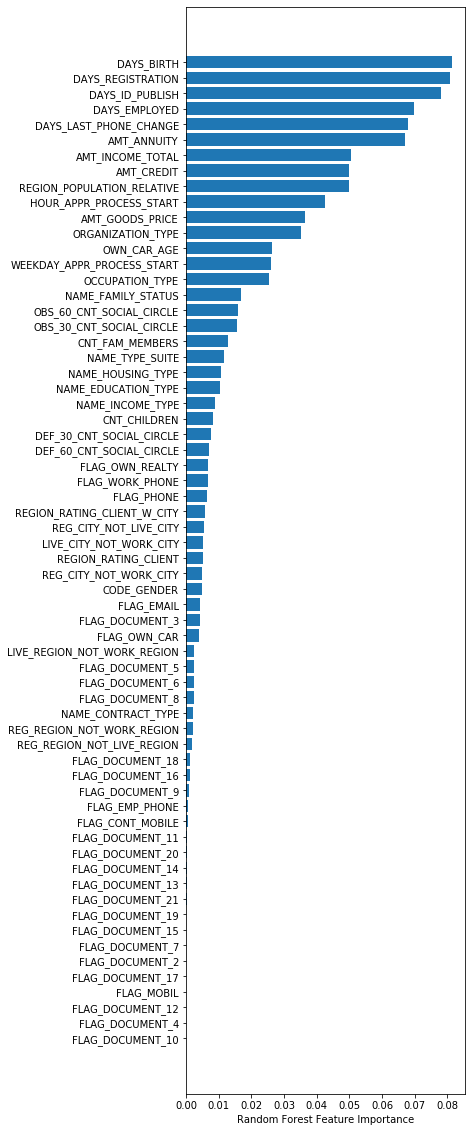

In [7]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [8]:
# Will be using up until variable FLAG_DOCUMENT_16 because after that the variables are not visible anymore.
# Will be testing the accuracy of the different variables. 

In [9]:
feature_importance =['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE',
                'AMT_ANNUITY','AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','AMT_CREDIT','HOUR_APPR_PROCESS_START',
                'AMT_GOODS_PRICE','ORGANIZATION_TYPE','OWN_CAR_AGE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE',
                'NAME_FAMILY_STATUS','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS',
                'NAME_TYPE_SUITE','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','CNT_CHILDREN',
                'DEF_30_CNT_SOCIAL_CIRCLE','FLAG_OWN_REALTY','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_WORK_PHONE',
                'FLAG_PHONE','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REGION_RATING_CLIENT','CODE_GENDER',
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_EMAIL','FLAG_DOCUMENT_3','FLAG_OWN_CAR',
                'FLAG_DOCUMENT_8','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','NAME_CONTRACT_TYPE',
                'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_18','FLAG_DOCUMENT_16'] 

In [10]:
X = X[feature_importance]
Y = df.TARGET
X.shape

(307511, 47)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

In [12]:
model_gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=500)
model_gb.fit(X_train.iloc[:,:47], y_train)
train_score = model_gb.score(X_train.iloc[:,:47], y_train)
test_score = model_gb.score(X_test.iloc[:,:47], y_test)
print("Accuracy score (training): ", train_score)
print("Accuracy score (test): ", test_score)

Accuracy score (training):  0.9192465285681767
Accuracy score (test):  0.9203290896379038


Text(0.5, 1.0, 'GBT ROC Curve')

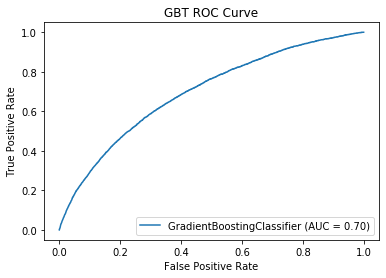

In [13]:
metrics.plot_roc_curve(model_gb,X_test.iloc[:,:47],y_test)
plt.title("GBT ROC Curve")